In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

**Task 1: Read the dataset and do data pre-processing**

In [ ]:
# Reading the csv file

df = pd.read_csv('/content/drug200.csv')

In [ ]:
# Visualizing the first 5 observations

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
# Visualizing the last 5 observations

df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [ ]:
# Checking number of rows and columns in dataset

df.shape

(200, 6)

In [ ]:
# descriptive statistics

df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [ ]:
# Checking for null values

df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
# We do not have any null values so we can skip the handling null values step.

In [ ]:
# Checking the datatype  of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
# Finding unique category

df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [ ]:
# Finding the count of observations based on unique value

df['Drug'].value_counts() 

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

<Axes: >

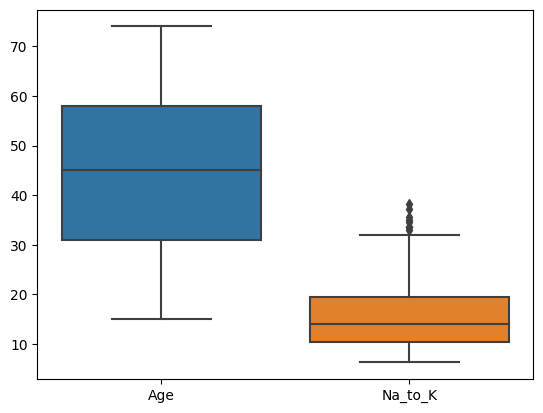

In [ ]:
sns.boxplot(df)

<Axes: >

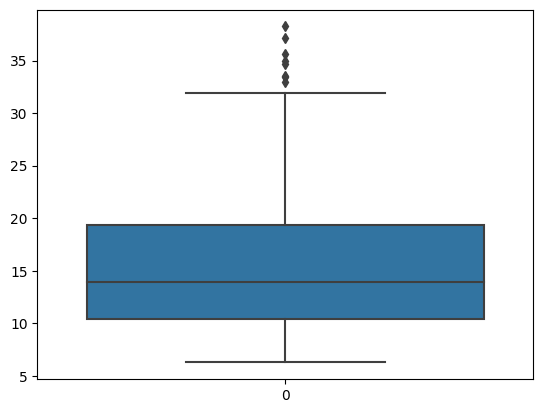

In [ ]:
sns.boxplot(df['Na_to_K'])

In [ ]:
# Outlier Removal

q1 = df.Na_to_K.quantile(.25)
q3 = df.Na_to_K.quantile(.75)

In [ ]:
q1

10.4455

In [ ]:
q3

19.38

In [ ]:
IQR = q3 - q1
IQR

8.9345

In [ ]:
upper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR

In [ ]:
upper_limit

32.78175

In [ ]:
df = df[df.Na_to_K<upper_limit]

<Axes: >

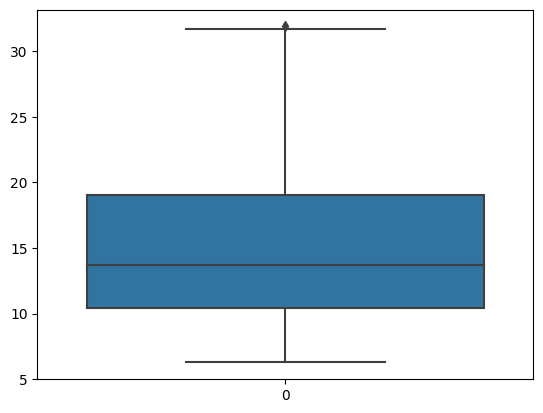

In [ ]:
sns.boxplot(df['Na_to_K'])

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Sex', 'BP', 'Cholesterol'], drop_first=True)
df_encoded

,Age,Na_to_K,Drug,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,DrugY,0,0,0,0
1,47,13.093,drugC,1,1,0,0
2,47,10.114,drugC,1,1,0,0
3,28,7.798,drugX,0,0,1,0
4,61,18.043,DrugY,0,1,0,0
...,...,...,...,...,...,...,...
195,56,11.567,drugC,0,1,0,0
196,16,12.006,drugC,1,1,0,0
197,52,9.894,drugX,1,0,1,0
198,23,14.020,drugX,1,0,1,1


In [ ]:
# Splitting the data

x = df_encoded.drop('Drug', axis=1)
x

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,0,0,0,0
1,47,13.093,1,1,0,0
2,47,10.114,1,1,0,0
3,28,7.798,0,0,1,0
4,61,18.043,0,1,0,0
...,...,...,...,...,...,...
195,56,11.567,0,1,0,0
196,16,12.006,1,1,0,0
197,52,9.894,1,0,1,0
198,23,14.020,1,0,1,1


In [ ]:
y = pd.get_dummies(df_encoded['Drug']).values
y

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0,

In [ ]:
# Splitting the data into train and test

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)

In [ ]:
print('x.shape = ',x.shape)
print('y.shape = ',y.shape)

x.shape =  (192, 6)
y.shape =  (192, 5)


In [ ]:
print('xtrain.shape = ',xtrain.shape)
print('xtest.shape = ',xtest.shape)
print('ytrain.shape = ',ytrain.shape)
print('ytest.shape = ',ytest.shape)

xtrain.shape =  (153, 6)
xtest.shape =  (39, 6)
ytrain.shape =  (153, 5)
ytest.shape =  (39, 5)


In [ ]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

**Task 2: Build the ANN model with (input layer, min 3 hidden layers & output layer)**

In [ ]:
# ANN Model

# Initializing the Sequential model
model = Sequential()

# Adding the input layer to the model
model.add(Dense(8,input_dim=6,activation='relu'))

# Adding the 1st hidden layer to the model
model.add(Dense(64,activation='relu'))
# Adding the 2nd hidden layer to the model
model.add(Dense(26,activation='relu'))
# Adding the 3rd hidden layer to the model
model.add(Dense(32,activation='relu'))

# Adding output layer
model.add(Dense(5,activation='softmax'))

In [ ]:
# Compiling the skeleton with loss and gradient decent

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Summary of the model

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 8)                 56        
                                                                 
 dense_36 (Dense)            (None, 64)                576       
                                                                 
 dense_37 (Dense)            (None, 26)                1690      
                                                                 
 dense_38 (Dense)            (None, 32)                864       
                                                                 
 dense_39 (Dense)            (None, 5)                 165       
                                                                 
Total params: 3,351
Trainable params: 3,351
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training the model

model.fit(xtrain,ytrain,epochs=20,batch_size=5,validation_data=(xtest,ytest))

Epoch 1/20
31/31 [==============================] - 1s 10ms/step - loss: 1.4522 - accuracy: 0.3725 - val_loss: 1.3461 - val_accuracy: 0.4872
Epoch 2/20
31/31 [==============================] - 0s 3ms/step - loss: 1.2396 - accuracy: 0.5556 - val_loss: 1.1463 - val_accuracy: 0.5641
Epoch 3/20
31/31 [==============================] - 0s 4ms/step - loss: 1.0436 - accuracy: 0.5948 - val_loss: 0.9693 - val_accuracy: 0.5897
Epoch 4/20
31/31 [==============================] - 0s 3ms/step - loss: 0.8595 - accuracy: 0.6340 - val_loss: 0.8033 - val_accuracy: 0.6667
Epoch 5/20
31/31 [==============================] - 0s 4ms/step - loss: 0.7049 - accuracy: 0.7516 - val_loss: 0.6769 - val_accuracy: 0.7179
Epoch 6/20
31/31 [==============================] - 0s 4ms/step - loss: 0.5782 - accuracy: 0.7908 - val_loss: 0.5555 - val_accuracy: 0.7692
Epoch 7/20
31/31 [==============================] - 0s 4ms/step - loss: 0.4956 - accuracy: 0.8170 - val_loss: 0.4819 - val_accuracy: 0.8205
Epoch 8/20
31/31 [=

In [ ]:
test_loss, test_acc = model.evaluate(xtest, ytest)
print('Test loss: ', test_loss)
print('Test accuracy: ', test_acc * 100, '%')

2/2 [==============================] - 0s 8ms/step - loss: 0.2146 - accuracy: 0.8974
Test loss:  0.2145928591489792
Test accuracy:  89.74359035491943 %


**Task 3: Test the model with random data**

In [ ]:
model.predict([[48, 12.345, 1, 0, 1, 0]])

1/1 [==============================] - 0s 54ms/step


array([[1.0000000e+00, 2.1755178e-09, 1.8689075e-09, 9.8239510e-17,
        9.5429545e-13]], dtype=float32)

In [ ]:
model.predict([[24, 23.456, 0, 1, 0, 1]])

1/1 [==============================] - 0s 54ms/step


array([[1., 0., 0., 0., 0.]], dtype=float32)